In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df  = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [3]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5395,5396,CA-2014-104829,11/18/2014,11/21/2014,Second Class,JG-15805,John Grady,Corporate,United States,Provo,...,84604,West,OFF-PA-10003016,Office Supplies,Paper,"Adams ""While You Were Out"" Message Pads",21.98,7,0.0,9.891


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df['Order Date']  =pd.to_datetime(df['Order Date'])
df['Ship Date']  =pd.to_datetime(df['Ship Date'])

In [7]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order day of week'] = df['Order Date'].dt.dayofweek

In [8]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,6,2016,6


In [9]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()
sales_by_month

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


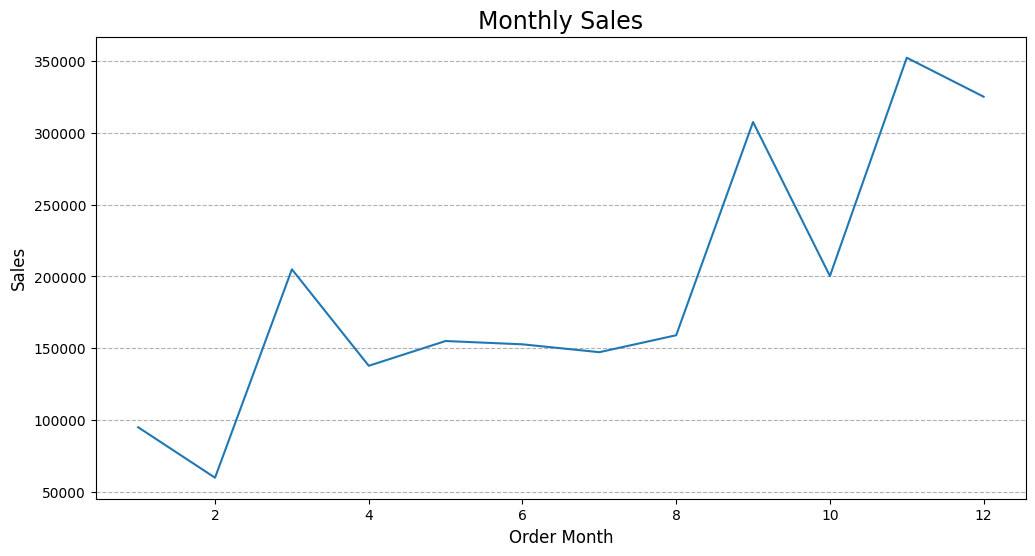

In [10]:
plt.figure(figsize=(12,6))
plt.title('Monthly Sales', fontsize=17)
sns.lineplot(x='Order Month', y='Sales',data=sales_by_month)
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.show()

In [11]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index().sort_values(['Category'], ascending=False)

In [12]:
sales_by_category

,Category,Sales
2,Technology,836154.0330
1,Office Supplies,719047.0320
0,Furniture,741999.7953


C:\Users\wyadn\AppData\Local\Temp\ipykernel_5948\2230800240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='Set1')


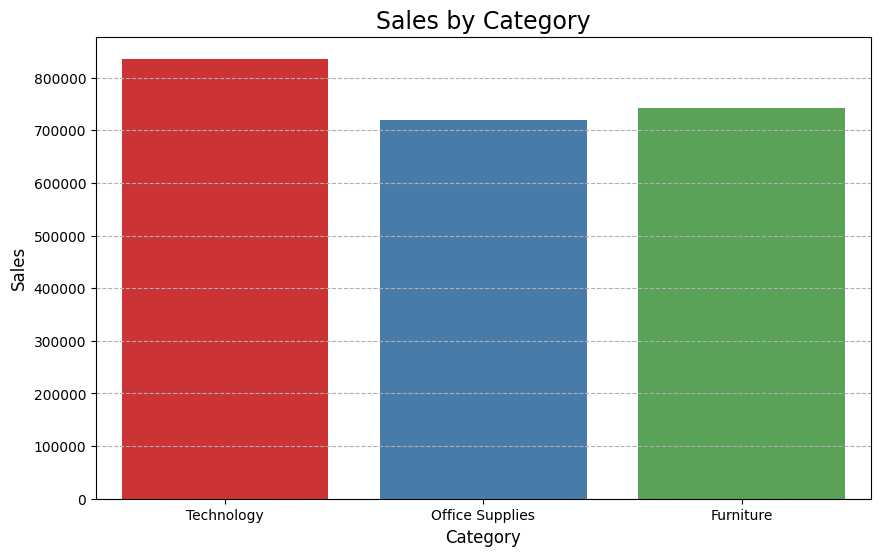

In [13]:
plt.figure(figsize=(10,6))
plt.title('Sales by Category', fontsize=17)
sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='Set1')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.show()

In [14]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()

In [15]:
sales_by_subcategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


C:\Users\wyadn\AppData\Local\Temp\ipykernel_5948\3029489438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=sales_by_subcategory, palette='crest')


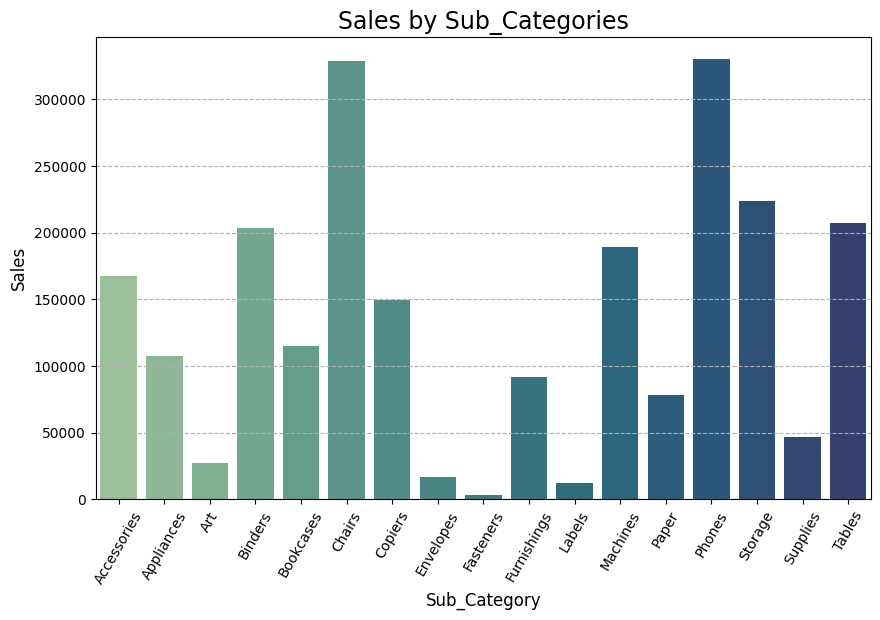

In [16]:
plt.figure(figsize=(10,6))
plt.title('Sales by Sub_Categories', fontsize=17)
sns.barplot(x='Sub-Category', y='Sales', data=sales_by_subcategory, palette='crest')
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=60)
plt.grid(linestyle='--', axis='y')
plt.show()

In [17]:
profit_by_month = df.groupby('Order Month')['Profit'].sum().reset_index()

In [18]:
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


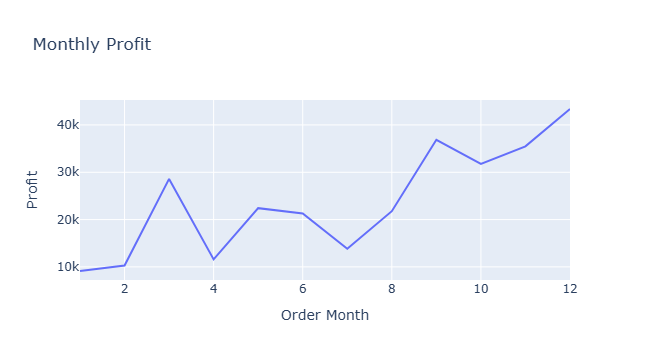

In [19]:
fg = px.line(profit_by_month, x='Order Month', y='Profit', title= 'Monthly Profit')
fg.show()

In [20]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

In [21]:
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


C:\Users\wyadn\AppData\Local\Temp\ipykernel_5948\2707512272.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




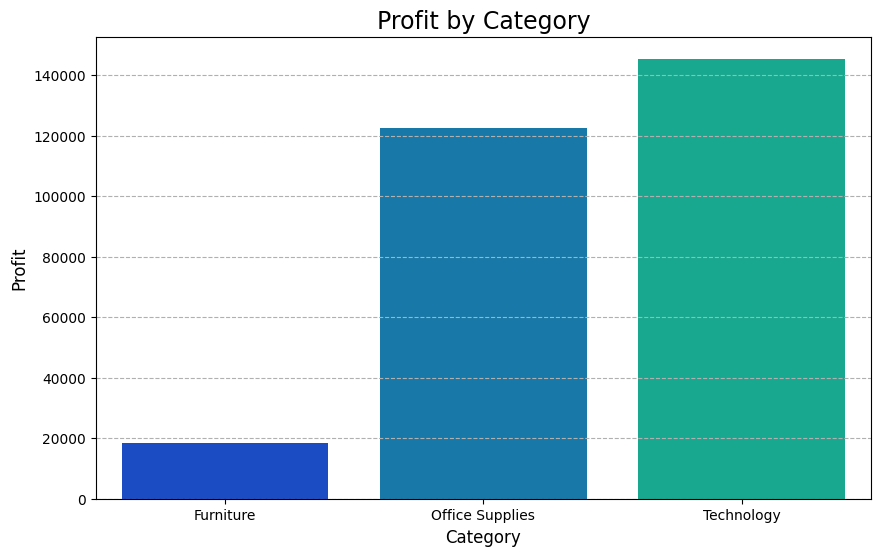

In [22]:
plt.figure(figsize=(10,6))
plt.title('Profit by Category', fontsize=17)
sns.barplot(x='Category', y='Profit', data=profit_by_category, palette='winter')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.show()

In [23]:
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()

In [24]:
profit_by_subcategory

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


C:\Users\wyadn\AppData\Local\Temp\ipykernel_5948\4046960084.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




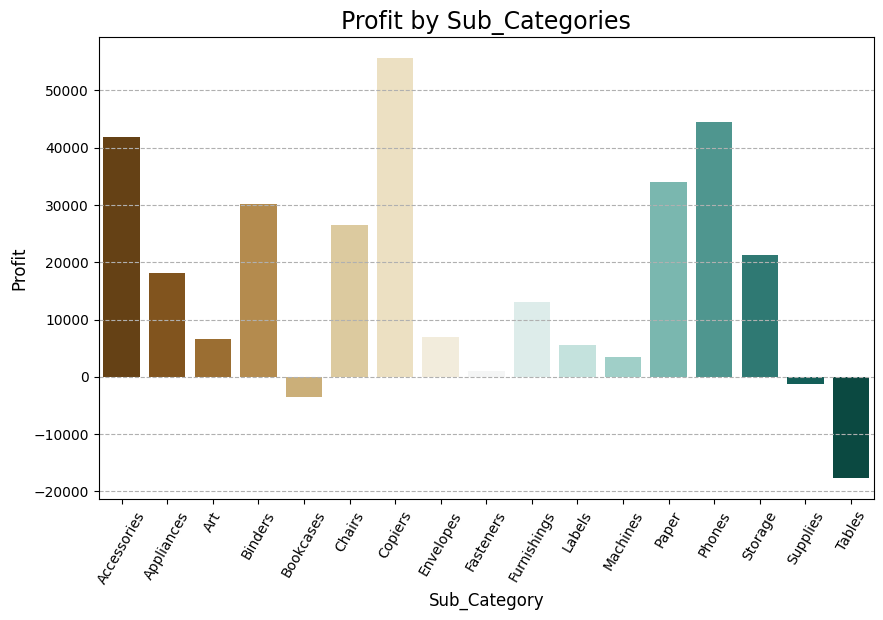

In [25]:
plt.figure(figsize=(10,6))
plt.title('Profit by Sub_Categories', fontsize=17)
sns.barplot(x='Sub-Category', y='Profit', data=profit_by_subcategory, palette='BrBG')
plt.xlabel('Sub_Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=60)
plt.grid(linestyle='--', axis='y')
plt.show()

C:\Users\wyadn\AppData\Local\Temp\ipykernel_5948\4228075598.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




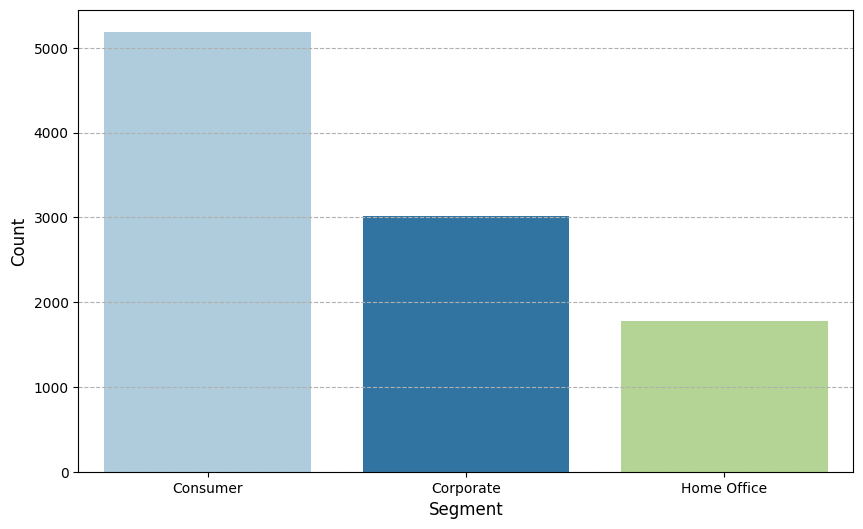

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Segment', data=df, palette='Paired')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(linestyle='--', axis='y')
plt.show()

In [27]:
sale_profit_by_segment = df.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

In [28]:
sale_profit_by_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785
